# Feature Engineering - Project (without implementation)

### Importing Libraries - STEP 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import ArcGIS
nom = ArcGIS()
from sklearn.cluster import KMeans

### Importing and Feature engineering on the dataset.

In [ ]:
#First Step is Feature engineering :

def convert_ava(date):
    date = "21-Dec".replace("-"," ")
    date = date.split()
    s = " "
    year = str(int(date[0]) + 2000)
    month = str(date[1])

    s = year+" "+month

    return pd.to_datetime(s)

data["availability"].replace(['Ready To Move'],["21-Dec"],inplace=True)
data["availability"] =  data["availability"].apply(convert_ava) 

data["availability"] = pd.to_numeric(data["availability"])

def convert_size(size):
    size = size.split()
    return int(size[0])

data["size"] = data["size"].apply(convert_size)


def convert_area(area):
    if area == 'Super built-up  Area':
        return 3
    elif area == 'Built-up  Area':
        return 2
    elif area == 'Plot  Area':
        return 1

data["area_type"] = data["area_type"].apply(convert_area)



def convert_sqft(sqft):
    sqft = sqft.split()
    if len(sqft)>1:
        return (int(sqft[0]) + int(sqft[2])) //2
    else:
        sqft = sqft[0]
        return sqft
    
data["total_sqft"] = data["total_sqft"].apply(convert_sqft)



data = pd.get_dummies(data=data, columns =["location"])
data["Price"] = data["price"]
data.drop("price",axis=1,inplace=True)
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


### Fitting to linear Regression and calculating the error :  STEP 3

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = np.round(model.predict(x_test),2)
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_pred,y_test)
print(f"error using metrics mean_squared_error is : {error}")

### Visualizing the Final results 

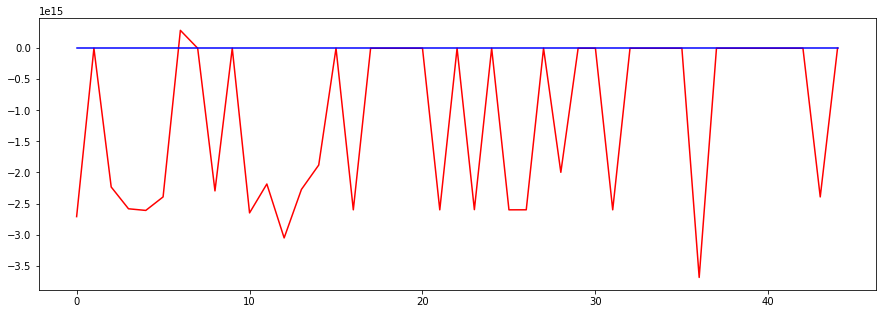

In [32]:
plt.figure(figsize=(15,5))
plt.plot(y_pred,color="red")
plt.plot(y_test,color="blue")

# Feature Engineering - Project (with implementation)

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import ArcGIS
nom = ArcGIS()
from sklearn.cluster import KMeans

In [146]:
class Feature_engineering:
    def __init__(self,data,column):
        self.data = data
        self.column = column
    
    
    
    def get_k_value(self):
        series = self.data[self.column]
        coordinates_x = []
        coordinates_y = []

        for i in range(len(series)):
            locations = nom.geocode(series[i])

            if locations is None:
                coordinates_x.append(0)
                coordinates_y.append(0)
            elif locations is not None:
                coordinates_x.append(locations[1][0])
                coordinates_y.append(locations[1][1])

        d = {"x":coordinates_x,"y":coordinates_y}
        x = pd.DataFrame(data=d)
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        new_data = sc.fit_transform(x)
        self.new_data = new_data

#         from sklearn.cluster import KMeans
        ssd =[]
        for i in range(2,10):
            kmeans = KMeans(n_clusters=i)
            kmeans.fit(new_data)
            ssd.append(kmeans.inertia_)
        plt.plot(range(2,10),ssd)
        
        
    def fit_model(self,k_value):
        model = KMeans(n_clusters = k_value)
        y_pred = model.fit_predict(self.new_data)
        data[self.column] = y_pred
        return data
    
    


    

In [174]:
data = pd.read_csv("Train.csv")
data = data.iloc[:150,:]

data.drop("society",axis=1,inplace=True)
data["balcony"].fillna(0,inplace=True)
data["bath"].fillna(2,inplace=True)

In [178]:
def convert_ava(date):
    date = "21-Dec".replace("-"," ")
    date = date.split()
    s = " "
    year = str(int(date[0]) + 2000)
    month = str(date[1])

    s = year+" "+month

    return pd.to_datetime(s)

data["availability"].replace(['Ready To Move'],["21-Dec"],inplace=True)
data["availability"] =  data["availability"].apply(convert_ava) 

data["availability"] = pd.to_numeric(data["availability"])

def convert_size(size):
    size = size.split()
    return int(size[0])

data["size"] = data["size"].apply(convert_size)


def convert_area(area):
    if area == 'Super built-up  Area':
        return 3
    elif area == 'Built-up  Area':
        return 2
    elif area == 'Plot  Area':
        return 1

data["area_type"] = data["area_type"].apply(convert_area)



def convert_sqft(sqft):
    sqft = sqft.split()
    if len(sqft)>1:
        return (int(sqft[0]) + int(sqft[2])) //2
    else:
        sqft = sqft[0]
        return sqft
    
data["total_sqft"] = data["total_sqft"].apply(convert_sqft)


In [180]:
convert_ava = Feature_engineering(data,"location")

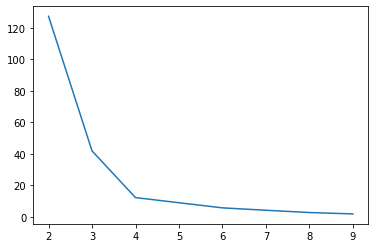

In [181]:
convert_ava.get_k_value()

In [182]:
data = convert_ava.fit_model(4)

In [239]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = np.round(model.predict(x_test),2)
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_pred,y_test)
print(f"error using metrics mean_squared_error is : {error}")

error using metrics mean_squared_error is : 3202.7776888888898


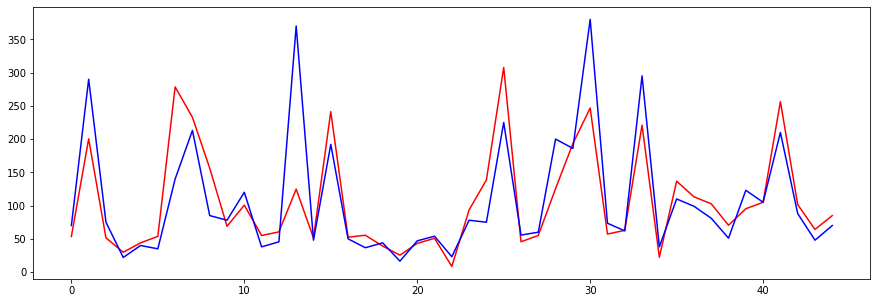

In [235]:
plt.figure(figsize=(15,5))
plt.plot(y_pred,color="red")
plt.plot(y_test,color="blue")